<center>
    <h1 style="font-size: 36px; font-weight: bold;">Predicting Potential Deposit Customers Using Machine Learning to Optimize Telemarketing Campaigns</h1>
</center>

## Business Problem
Tim marketing memiliki data mengenai kampanye telemarketing untuk produk deposito berjangka. Data ini mencakup nasabah yang berdeposito dan yang tidak berdeposito setelah menerima penawaran dari telemarketing.

### Permasalahan:
Tim marketing tidak selalu tahu nasabah mana yang akan berdeposito, meskipun sudah ada data yang tersedia mengenai interaksi mereka dengan pihak bank (seperti usia, status pekerjaan, saldo rekening, dan sebagainya).

### Metric:
#### False Positives (FP):
ML memprediksi nasabah akan berdeposito, padahal kenyataannya mereka tidak berdeposito.
**Konsekuensi:**
- Jika nasabah diprediksi akan berdeposito, tim marketing menghubungi nasabah tersebut. Hal ini menyebabkan biaya telemarketing yang tidak perlu.
- Biaya: Setiap panggilan telemarketing menghabiskan biaya untuk tenaga kerja dan sumber daya lainnya. Misalnya, kita asumsikan biaya telemarketing adalah Rp 50.000 per panggilan.

#### False Negatives (FN):
ML memprediksi nasabah akan tetap tidak berdeposito, padahal kenyataannya mereka berdeposito.
**Konsekuensi:**
- Jika nasabah diprediksi tidak akan berdeposito, tim marketing tidak menghubungi mereka. Ini menyebabkan kesempatan yang hilang untuk meningkatkan conversion rate dari kampanye.
- Biaya: Kehilangan potensi pendapatan karena nasabah yang sebenarnya berpotensi berdeposito tidak dihubungi. Kita asumsikan biaya peluang dari tidak menghubungi nasabah potensial adalah Rp 2.000.000 per nasabah yang seharusnya berdeposito.

### Cost Perbandingan:
Cost untuk melakukan telemarketing ke nasabah yang tidak berpotensi (FP) dianggap lebih rendah dibandingkan dengan biaya peluang dari kehilangan nasabah potensial yang seharusnya berdeposito (FN).
Oleh karena itu, cost FN lebih besar daripada cost FP. Hal ini membuat mendeteksi nasabah yang sebenarnya berdeposito menjadi prioritas utama.

### Maka dari itu, metric yang dipakai adalah:
**Recall:**
- Fokus utama adalah mendeteksi sebanyak mungkin nasabah yang akan berdeposito. Menghindari false negatives sangat penting untuk memaksimalkan conversion rate dan pendapatan dari kampanye telemarketing.
- Meskipun ada beberapa false positives (nasabah yang tidak akan berdeposito), biaya telemarketing lebih mudah dikelola dan tidak sebesar biaya peluang yang hilang akibat melewatkan prospek yang seharusnya berdeposito.

In [1]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

**Penjelasan:**
- `import numpy as np`: Mengimpor library `NumPy` yang digunakan untuk manipulasi data numerik dan array multidimensi.
- `import pandas as pd`: Mengimpor `pandas` untuk manipulasi dan analisis data, terutama data berbentuk tabel (DataFrame).
- `import seaborn as sns`: Mengimpor `seaborn` untuk visualisasi data statistik dengan cara yang lebih estetis dan mudah digunakan.
- `import matplotlib.pyplot as plt`: Mengimpor `matplotlib` untuk membuat berbagai jenis plot visualisasi data.
- `warnings.filterwarnings('ignore')`: Mengabaikan peringatan yang muncul selama eksekusi kode. Hal ini untuk menjaga kebersihan output.

## Data Understanding & Preparation
Pada tahap ini, dilakukan persiapan dataset yang akan digunakan dalam analisis. Proses ini meliputi pemahaman awal terhadap dataset dan pembersihan data untuk memastikan kualitas data yang baik sebelum digunakan untuk model klasifikasi.

### 1. Read Dataset
Dataset dibaca dari file CSV dan disimpan dalam DataFrame. Dataset ini berisi informasi mengenai kampanye pemasaran deposito berjangka, dengan tujuan untuk memprediksi apakah nasabah akan melakukan deposit atau tidak.

In [2]:
# Read dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')

**Penjelasan:**
- `pd.read_csv('data_bank_marketing_campaign.csv')`: Membaca file CSV yang berisi dataset tentang kampanye pemasaran deposito berjangka dan menyimpannya ke dalam sebuah DataFrame `df_raw`.

### 2. Creating a Backup
Salinan dataset dibuat untuk memastikan data asli tetap utuh, agar perubahan atau pembersihan data tidak memengaruhi dataset asli.

In [3]:
# Backup
df_copy = df.copy()

**Penjelasan:**
- `df_raw.copy()`: Membuat salinan dari dataset agar data asli tetap utuh, sehingga perubahan atau pembersihan data yang dilakukan tidak akan memengaruhi data asli.
- `df_copy`: Variabel baru yang menyimpan salinan data tanpa mempengaruhi dataset asli.

### 3. Data Overview
Informasi mengenai kolom dan tipe data pada dataset ditampilkan untuk memberikan gambaran awal tentang struktur dataset.

In [4]:
# Data overview
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


### 4. Selecting Relevant Columns for Analysis
Kolom-kolom yang relevan untuk analisis dan pemodelan dipilih. Kolom target, yaitu apakah nasabah melakukan deposit atau tidak, juga dipilih sebagai variabel yang akan diprediksi.

In [5]:
# Memilih kolom yang relevan untuk analisis dan pemodelan
df_copy = df_copy[['job',                  # categorical
                   'housing',              # categorical
                   'loan',                 # categorical
                   'contact',              # categorical
                   'month',                # categorical
                   'poutcome',              # categorical
                   'age',                  # numerical (scaled)
                   'balance',              # numerical (scaled)
                   'campaign',             # numerical (scaled)
                   'pdays',                # numerical (scaled)
                   'deposit'               # target variable
                  ]]

**Penjelasan:**
* **Fitur Kategorikal**: Kolom-kolom seperti `job`, `housing`, `loan`, `contact`, dan `month` adalah **variabel kategorikal** yang menggambarkan informasi deskriptif tentang nasabah dan konteks interaksi dengan mereka.
* **Fitur Numerik**: Kolom `campaign`, `pdays`, `balance`, dan `age` adalah **variabel numerik** yang menggambarkan jumlah kontak, waktu sejak kontak terakhir, saldo rekening, dan usia nasabah.
* **Target**: Kolom `deposit` adalah **variabel target** yang ingin diprediksi, yaitu apakah nasabah akan melakukan deposit atau tidak (`yes/no`).

| **Kolom**    | **Deskripsi**                                                                               | **Tipe Data** | **Keterangan**          |
| ------------ | ------------------------------------------------------------------------------------------- | ------------- | ----------------------- |
| **job**      | Profesi nasabah                                                                             | Categorical   | Tidak ada nilai hilang. |
| **housing**  | Status kepemilikan rumah nasabah (yes/no)                                                   | Categorical   | Tidak ada nilai hilang. |
| **loan**     | Status pinjaman nasabah (yes/no)                                                            | Categorical   | Tidak ada nilai hilang. |
| **contact**  | Saluran komunikasi yang digunakan untuk menghubungi nasabah (cellular, telephone, other)    | Categorical   | Tidak ada nilai hilang. |
| **month**    | Bulan kontak terakhir dilakukan dengan nasabah                                              | Categorical   | Tidak ada nilai hilang. |
| **poutcome** | Hasil kampanye sebelumnya (success, failure, other)                                         | Categorical   | Tidak ada nilai hilang. |
| **age**      | Usia nasabah                                                                                | Numeric       | Tidak ada nilai hilang. |
| **balance**  | Saldo rekening nasabah                                                                      | Numeric       | Tidak ada nilai hilang. |
| **campaign** | Jumlah kontak yang dilakukan pada kampanye ini                                              | Numeric       | Tidak ada nilai hilang. |
| **pdays**    | Jumlah hari sejak kontak terakhir dilakukan (nilai -1 berarti belum pernah dihubungi)       | Numeric       | Tidak ada nilai hilang. |
| **deposit**  | Apakah nasabah melakukan deposit atau tidak (target variabel)                               | Numeric       | Tidak ada nilai hilang. |

### 5. Displaying Descriptive Statistics
Statistik deskriptif ditampilkan untuk memberikan gambaran mengenai nilai rata-rata, standar deviasi, dan rentang nilai untuk kolom numerik, serta distribusi frekuensi untuk kolom kategorikal.

In [6]:
# Menampilkan statistik deskriptif untuk semua kolom
df_copy.describe(include='all')

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
count,7813,7813,7813,7813,7813,7813,7813.000000,7813.000000,7813.000000,7813.000000,7813
unique,12,2,2,3,12,4,NaN,NaN,NaN,NaN,2
top,management,no,no,cellular,may,unknown,NaN,NaN,NaN,NaN,no
freq,1792,4140,6789,5628,1976,5819,NaN,NaN,NaN,NaN,4081
mean,NaN,NaN,NaN,NaN,NaN,NaN,41.257264,1512.448611,2.519775,51.408550,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.919710,3089.291831,2.727001,108.072739,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,-6847.000000,1.000000,-1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.000000,127.000000,1.000000,-1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,549.000000,2.000000,-1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,1684.000000,3.000000,40.000000,NaN


### 6. Checking for Duplicates
Pemeriksaan duplikasi dilakukan untuk melihat apakah ada baris yang terduplikasi dalam dataset, yang bisa memengaruhi analisis atau model.

In [7]:
# Cek duplikasi di seluruh dataset
duplicates = df_copy.duplicated()

# Jumlah baris duplikat
print(f'Jumlah duplikasi: {duplicates.sum()}')

Jumlah duplikasi: 8


Hasil pemeriksaan menunjukkan apakah baris yang terdeteksi sebagai duplikat memiliki perbedaan relevan, seperti pada kolom age, yang menunjukkan bahwa setiap baris mungkin mewakili nasabah yang berbeda.

In [8]:
# Lihat baris duplikat
df_copy[duplicates]

,job,housing,loan,contact,month,poutcome,age,balance,campaign,pdays,deposit
2944,blue-collar,yes,no,unknown,may,unknown,40,0,2,-1,no
4368,management,no,no,cellular,aug,unknown,60,0,3,-1,yes
4874,management,no,no,cellular,aug,unknown,41,0,2,-1,no
5326,blue-collar,yes,no,cellular,jul,unknown,44,0,1,-1,no
5609,technician,yes,no,unknown,may,unknown,39,0,1,-1,no
5681,technician,no,no,cellular,aug,unknown,38,0,2,-1,no
5905,management,no,no,cellular,aug,unknown,34,0,2,-1,no
7077,blue-collar,yes,no,unknown,may,unknown,30,239,1,-1,yes


**Insight:**
- Meskipun 8 baris ini terdeteksi sebagai duplikat, ternyata setiap baris memiliki nilai `age` yang berbeda pada `job` yang sama, yang menunjukkan bahwa setiap baris ini mewakili nasabah yang berbeda.
- Tidak perlu menghapus duplikasi ini karena data yang terdeteksi sebagai duplikat merupakan entri yang valid untuk nasabah yang berbeda

### 7. Displaying Unique Values from Categorical Columns
Pada tahap ini, dilakukan pemeriksaan terhadap nilai unik dari setiap kolom kategorikal. Langkah ini memberikan gambaran mengenai variasi kategori yang ada dalam setiap kolom dan membantu memahami distribusi data serta potensi encoding untuk model klasifikasi.

In [9]:
# Unique values kolom kategori
categorical_columns = df_copy.select_dtypes(include=['object']).columns
unique_values = {col: df_copy[col].unique() for col in categorical_columns}

for column, unique_vals in unique_values.items():
    print(f"Unique values in '{column}': {unique_vals}")

Unique values in 'job': ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Unique values in 'housing': ['no' 'yes']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['cellular' 'telephone' 'unknown']
Unique values in 'month': ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
Unique values in 'poutcome': ['unknown' 'other' 'failure' 'success']
Unique values in 'deposit': ['yes' 'no']


**Insight:**
Mengubah atau menghapus nilai unknown bisa menyebabkan hilangnya informasi penting atau menghasilkan bias dalam model. Dengan membiarkan nilai ini, model dapat belajar untuk menghadapinya secara tepat, yang akan meningkatkan kemampuan model dalam menangani data tidak lengkap di dunia nyata tanpa mengurangi akurasi prediksi.

## EDA
Pada tahap Exploratory Data Analysis (EDA), dilakukan eksplorasi dataset untuk memperoleh pemahaman awal tentang distribusi data, hubungan antar fitur, dan karakteristik dataset yang dapat memengaruhi proses modeling.

Langkah pertama adalah memeriksa distribusi kolom deposit, yang merupakan target dalam prediksi. Distribusi antara nasabah yang berdeposito (yes) dan yang tidak berdeposito (no) dihitung dalam persentase.

In [11]:
# Cek kolom target
perc = (df_copy['deposit'].value_counts(normalize=True) * 100).round(2)
perc

deposit
no     52.23
yes    47.77
Name: proportion, dtype: float64

**Insight:**
- Secara umum, proporsi tidak terlalu imbalanced, yang berarti bahwa model klasifikasi yang digunakan tidak akan terlalu kesulitan dalam membedakan kedua kelas.

### Univariate Analysis
Pada tahap ini, dilakukan univariate analysis pada kolom-kolom numerik untuk melihat distribusi masing-masing fitur menggunakan histogram dan Kernel Density Estimation (KDE).

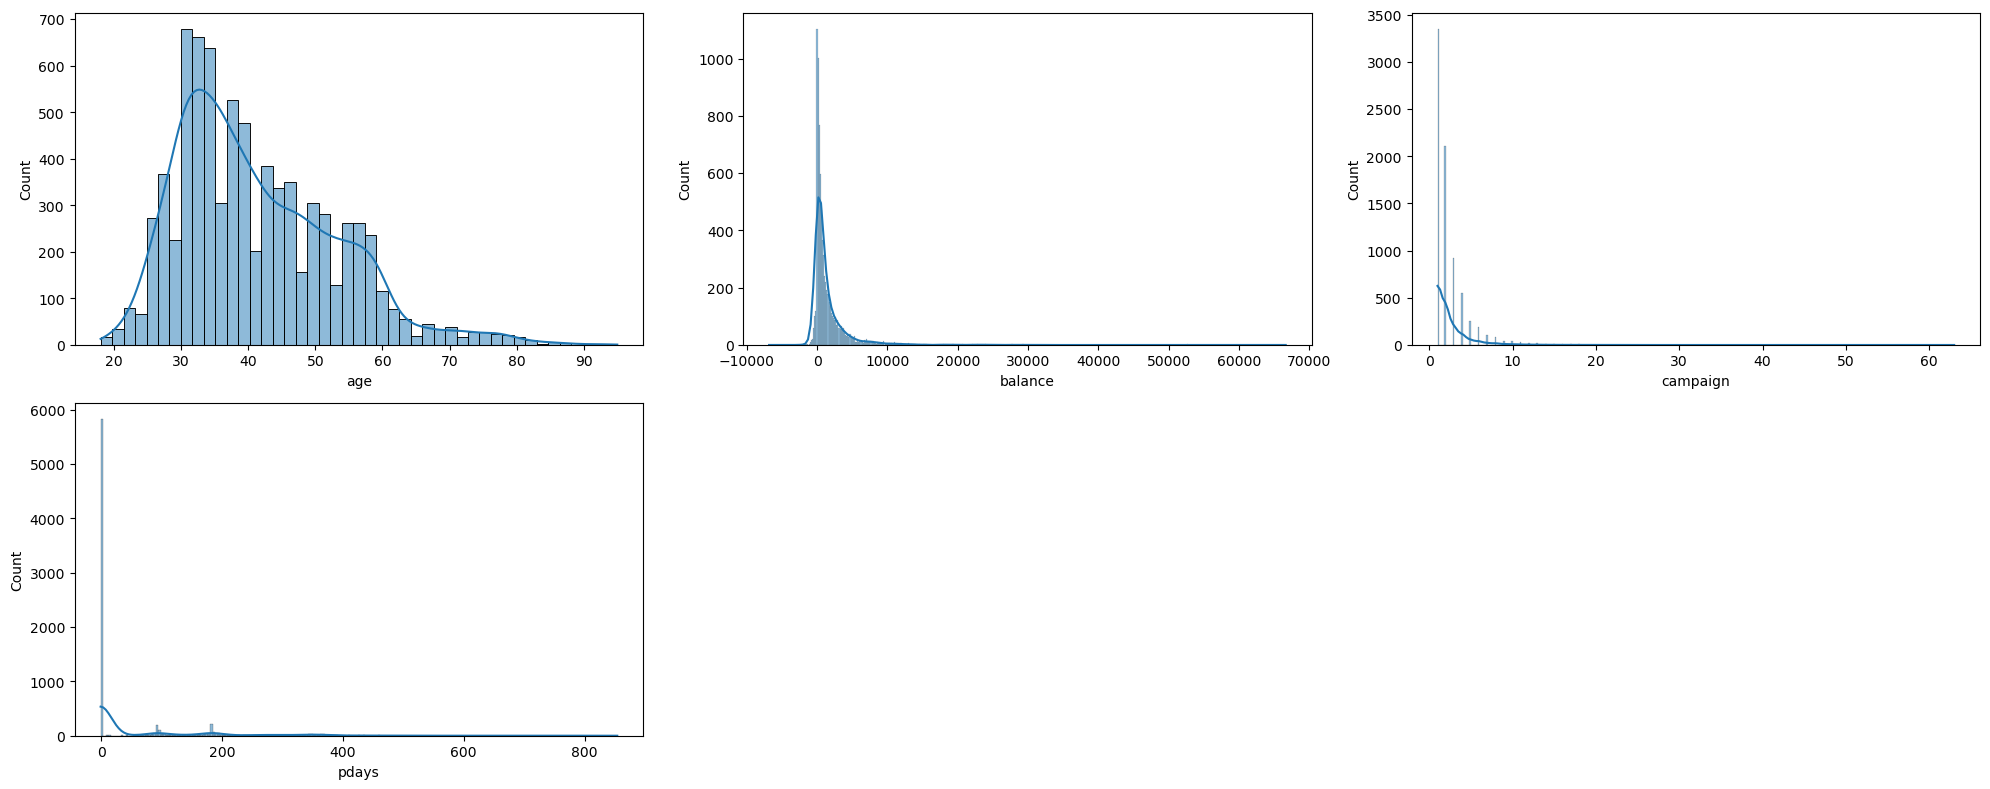

In [12]:
# Kolom numerik
num_cols = df_copy.describe().columns
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom numerik dan membuat subplot
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_copy[col], kde=True)
plt.tight_layout()
plt.show()

**Insight:**
- Skewness
- Untuk data yang skewed, menggunakan Robust Scaler, yang lebih tahan terhadap outliers

### Bivariate Analysis terhadap Kolom Target
Dilakukan juga bivariate analysis antara kolom target `deposit` dan kolom numerik lainnya dengan menggunakan bar plot untuk membandingkan distribusi median antara nasabah yang berdeposito dan yang tidak berdeposito.

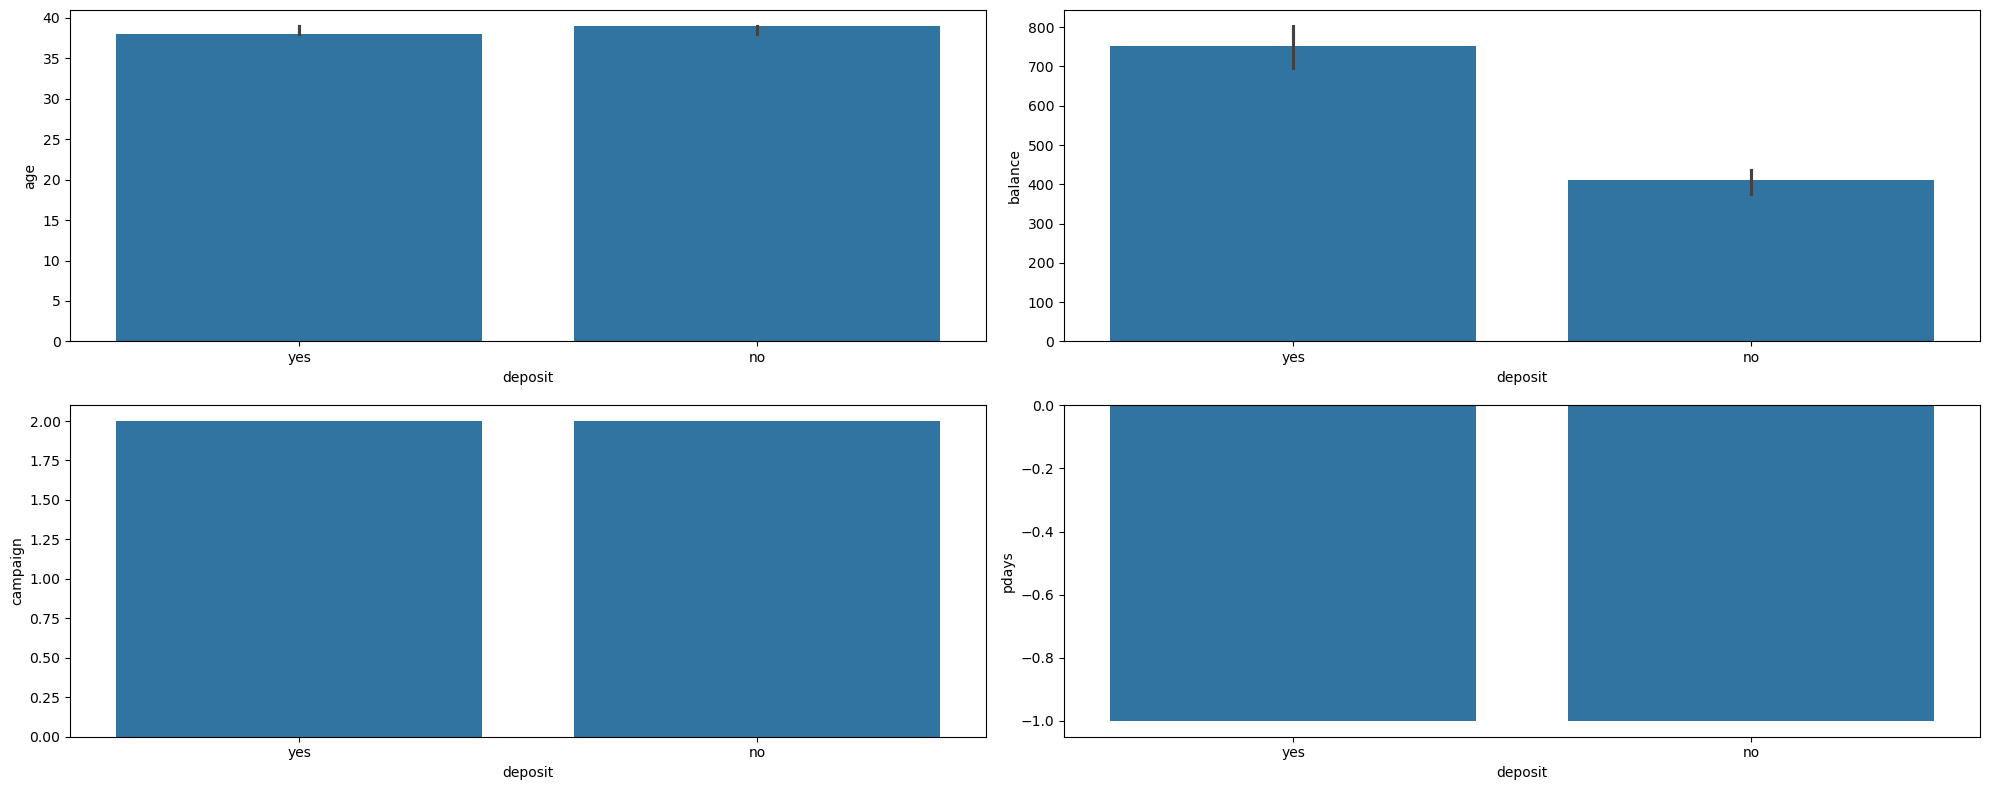

In [13]:
# Loop untuk setiap kolom numerik dan membuat subplot
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=df_copy, x='deposit', y=col, estimator='median')

plt.tight_layout()
plt.show()

### Univariate Analysis untuk Kolom Kategorikal
Langkah berikutnya adalah memeriksa kolom kategorikal seperti job, housing, loan dan contact menggunakan count plot untuk melihat distribusi kategori berdasarkan status deposit (berdeposito atau tidak).

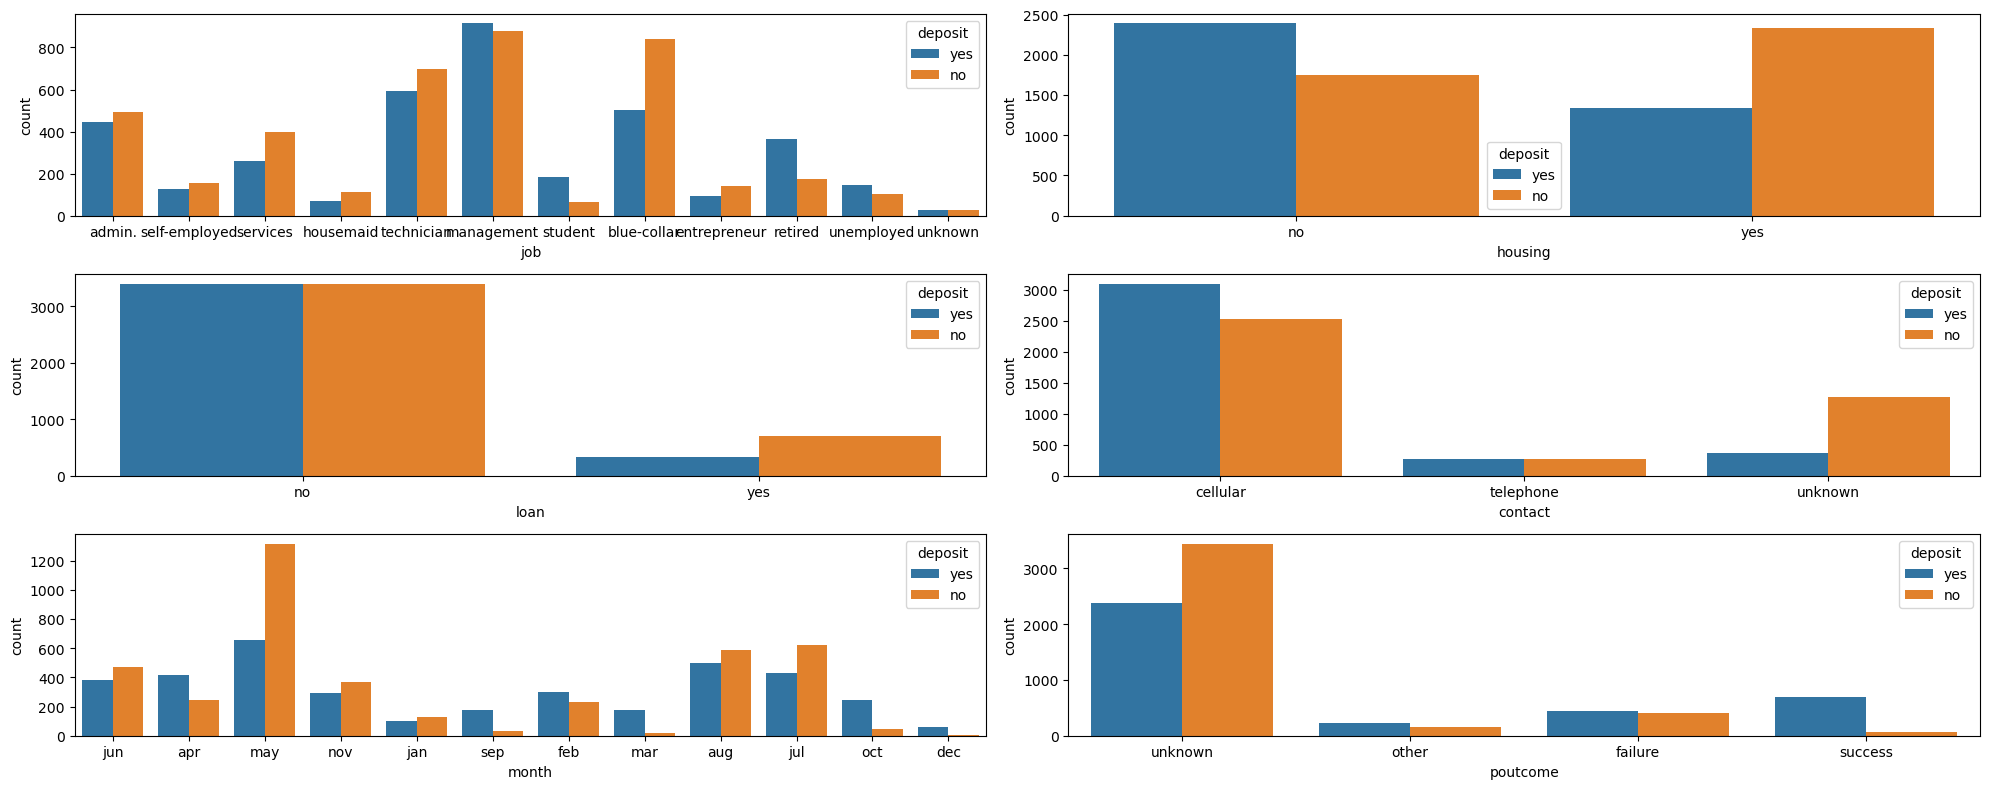

In [14]:
# Kolom kategorikal yang ingin dianalisis
cols_cat = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
plt.figure(figsize=(20, 8))

# Loop untuk setiap kolom kategorikal dan membuat subplot
for i, col in enumerate(cols_cat):
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=df_copy, x=col, hue='deposit')

plt.tight_layout()
plt.show()

## Define X & y
Pada tahap ini, variabel target `deposit` akan dipersiapkan untuk digunakan dalam pemodelan. Selain itu, fitur-fitur yang akan digunakan dalam model juga akan dipisahkan dari kolom target. Berikut adalah langkah-langkah yang dilakukan:

### 1. Changing Target Column Values
Kolom deposit yang berisi nilai kategorikal `yes/no` akan diubah menjadi format numerik, yaitu 1 untuk `yes` dan 0 untuk `no`. Ini dilakukan agar variabel target dapat digunakan dalam algoritma klasifikasi yang membutuhkan input numerik.

In [15]:
# Ubah deposit ke 0 dan 1
df_copy['deposit'] = df_copy['deposit'].map({'no': 0, 'yes': 1})

### 2. Defining the Features
Fitur yang digunakan untuk prediksi dipisahkan dari kolom target. Kolom-kolom selain `deposit` akan digunakan sebagai fitur dalam model.

Kolom `deposit` yang sudah diubah menjadi numerik akan digunakan sebagai variabel target `y` untuk model klasifikasi.

In [16]:
# Columns
X = df_copy.drop(columns = ['deposit'])

# Target
y = df_copy['deposit']

## Train Test Split
Pada tahap ini, dataset akan dibagi menjadi dua bagian: data pelatihan (training set) dan data pengujian (test set). Pembagian data ini penting agar model dapat dilatih menggunakan data pelatihan dan dievaluasi menggunakan data yang belum pernah dilihat sebelumnya (data pengujian). Berikut adalah langkah-langkahnya:

### 1. Splitting the Data
Data akan dibagi dengan proporsi 80% untuk data pelatihan dan 20% untuk data pengujian. Pembagian ini memastikan bahwa model dapat dilatih dengan data yang cukup dan diuji dengan data yang representatif.

In [17]:
# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 42,
                                    )

In [18]:
# Menentukan kolom mana saja yang masuk ke kategori dan numerik
cat_cols = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'campaign', 'pdays']

### 2. Handling Numerical and Categorical Columns
Setelah pembagian data, tahapan selanjutnya adalah transformasi fitur baik untuk kolom numerik maupun kategorikal. Kolom numerik akan diproses menggunakan RobustScaler, yang lebih tahan terhadap outliers, sementara kolom kategorikal akan diubah menjadi format yang sesuai menggunakan OneHotEncoder karena tidak memiliki urutan atau hierarki antar kategori.

In [19]:
# Pipeline untuk kolom numerik
scale = Pipeline(steps = [
    ('scaler', RobustScaler())  # Scaling menggunakan RobustScaler
])

# Pipeline untuk kolom kategorikal
cat = Pipeline(steps = [
    ('ohe', OneHotEncoder(drop = 'first'))  # OneHotEncoding, menghapus kategori pertama untuk menghindari dummy variable trap
])

# Column Transformer
ct = ColumnTransformer(transformers = [
    ('cat', cat, cat_cols),
    ('scale', scale, num_cols)
], remainder='passthrough')

## Modeling

### Modeling
Pada tahap ini, berbagai model klasifikasi diuji untuk memprediksi apakah nasabah akan melakukan deposito atau tidak, berdasarkan fitur yang telah diproses sebelumnya. Fokus utama adalah meminimalkan false negatives (FN), karena biaya peluang yang terkait dengan nasabah yang tidak terhubung meskipun berpotensi berdeposito jauh lebih tinggi daripada biaya telemarketing kepada nasabah yang tidak berpotensi (false positives).

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

### 1. Model Definitions
- Random Forest dan XGBoost dipilih karena kekuatan mereka dalam menangani data non-linier dan interaksi antar fitur secara otomatis, yang sangat penting dalam kasus ini. Meskipun data nasabah dapat memiliki banyak hubungan yang kompleks antar fitur (seperti usia, saldo rekening, dan status pekerjaan), model ini dapat memodelkan hubungan-hubungan tersebut secara efektif dan memberikan probabilitas prediksi yang lebih akurat, sehingga lebih mampu mengurangi FN (nasabah yang tidak dihubungi padahal seharusnya berdeposito).
- Gradient Boosting dipilih karena kemampuan model ini untuk meningkatkan performa dengan iterasi bertahap, di mana setiap pohon keputusan yang dibangun dapat mengatasi kesalahan dari model sebelumnya. Hal ini sangat berguna untuk memaksimalkan recall, yang menjadi prioritas dalam konteks biaya peluang dari kehilangan nasabah yang berpotensi berdeposito. Dengan teknik boosting, model ini dapat secara efektif mengurangi FN tanpa terlalu mengorbankan false positives.
- Logistic Regression digunakan sebagai model baseline. Walaupun lebih sederhana, Logistic Regression memungkinkan untuk mendapatkan interpretasi yang jelas mengenai pengaruh tiap fitur terhadap keputusan nasabah. Model ini berguna untuk membandingkan kinerja model yang lebih kompleks dan untuk mendapatkan pemahaman dasar tentang variabel mana yang paling mempengaruhi keputusan nasabah untuk berdeposito. Ini penting karena kami juga perlu memahami faktor-faktor utama yang mempengaruhi keputusan nasabah, untuk merencanakan strategi telemarketing yang lebih terarah.

In [21]:
# Defisini Model
models = {'RandomForest': RandomForestClassifier(random_state = 42),
         'GradienBoost': GradientBoostingClassifier(random_state = 42),
         'XGBoost': XGBClassifier(random_state = 42),
         'LogReg': LogisticRegression()}

### 2. Cross-Validation & Evaluation Metrics

Model dievaluasi menggunakan metrik berikut:

- Recall: Metrik utama yang digunakan untuk mengukur kemampuan model dalam mendeteksi nasabah yang berpotensi berdeposito. Mengingat biaya peluang yang besar akibat false negatives (FN), recall menjadi prioritas utama.
- F2-Score: Metrik yang lebih menekankan pada recall, dengan memberikan penalti lebih besar pada false negatives dibandingkan false positives. F2-score dipilih karena fokus kita adalah meminimalkan FN untuk memaksimalkan konversi kampanye telemarketing.
- ROC-AUC: Metrik yang mengukur kemampuan model dalam membedakan antara dua kelas (`yes` dan `no`). Meskipun recall dan F2-score adalah prioritas, ROC-AUC tetap penting untuk menilai seberapa baik model memisahkan kedua kelas.

Setiap model dilatih dan dievaluasi menggunakan 5-fold cross-validation. Rasio distribusi data antara kelas `yes` dan `no` adalah 53:47, yang relatif seimbang. Dengan distribusi data ini, 5-fold cross-validation dianggap sudah cukup untuk memberikan representasi yang baik dari keseluruhan dataset, tanpa memerlukan pembagian data yang terlalu banyak atau terlalu sedikit.

- Kenapa bukan 10-fold? 10-fold cross-validation cenderung memakan lebih banyak waktu komputasi karena data dibagi lebih banyak. Mengingat ukuran dataset yang tidak terlalu besar, 5-fold cross-validation sudah cukup untuk memberikan hasil yang stabil dan representatif, tanpa menambah waktu komputasi secara signifikan.
- Kenapa bukan 3-fold? 3-fold cross-validation dapat menyebabkan model mengalami overfitting atau underfitting karena pembagian data yang terlalu sedikit pada setiap fold. Hal ini berisiko mengurangi kestabilan dan kemampuan generalisasi model.

Dengan **5-fold cross-validation**, hasil evaluasi disusun dalam DataFrame dan diurutkan berdasarkan **recall**, yang menjadi prioritas utama. Model dengan recall tertinggi dipilih sebagai yang terbaik untuk mendeteksi nasabah yang berpotensi berdeposito.

In [22]:
# Placeholder untuk hasil
results = []

# Loop untuk setiap model
for name, model in models.items():
    # Membuat pipeline dengan preprocessing dan model
    pipe = Pipeline([
        ('transformer', ct), # ColumnTransformer untuk preprocessing
        ('model', model)]) # Model klasifikasi
    
    # F2-Score dengan make_scorer
    F2 = make_scorer(fbeta_score, beta=2)

    # Cross-validation untuk Accuracy, Recall, Precision, F1, dan ROC-AUC
    rec = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = 'recall')
    f2 = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = F2)
    roc = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = 'roc_auc')
    
    # Menyimpan hasil
    results.append({'Model': name,
                   'Recall': rec.mean(),
                   'F2-Score': f2.mean(),
                   'ROC-AUC': roc.mean()
                   })

# Menampilkan hasil
df_result = pd.DataFrame(results).sort_values('Recall', ascending = False)
df_result

,Model,Recall,F2-Score,ROC-AUC
2,XGBoost,0.634938,0.648634,0.755095
0,RandomForest,0.633599,0.646832,0.753580
1,GradienBoost,0.613485,0.637725,0.775777
3,LogReg,0.583318,0.608847,0.758595


**Insight:**
- XGBoost menghasilkan Recall tertinggi (0.6349)
- RandomForest sedikit lebih rendah dalam hal recall (0.6336)
- GradientBoost memiliki recall yang sedikit lebih rendah (0.6135)
- Logistic Regression memiliki performa terendah dalam hal Recall (0.5833)

### Modeling with Best Model
Pada tahap ini, model terbaik yang terpilih, yaitu XGBoost, diterapkan pada data uji untuk mendapatkan prediksi dan mengevaluasi performa model menggunakan beberapa metrik, termasuk recall, ROC-AUC, dan F2-Score.

In [23]:
from sklearn.metrics import roc_auc_score, classification_report, recall_score

In [24]:
baseline_pipe = Pipeline([
        ('Preprocessing', ct),
        ('model', XGBClassifier(random_state=42))
    ])

# Fit dan evaluasi di test set
baseline_pipe.fit(X_train, y_train)
y_pred = baseline_pipe.predict(X_test)
y_pred_proba = baseline_pipe.predict_proba(X_test)[:,1]

recall_baseline = recall_score(y_test, y_pred)
roc_baseline = roc_auc_score(y_test, y_pred_proba)
f2_baseline = fbeta_score(y_test, y_pred, beta = 2)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       814
           1       0.71      0.62      0.66       749

    accuracy                           0.70      1563
   macro avg       0.70      0.70      0.70      1563
weighted avg       0.70      0.70      0.70      1563



**Insight:**
1. **Recall pada Kelas `0` vs Kelas `1`**:
   - Recall untuk kelas `0` (nasabah yang **tidak berdeposito**) adalah **0.77**, yang menunjukkan bahwa model sangat efektif dalam mengidentifikasi nasabah yang tidak berdeposito. Ini berarti model dapat dengan baik menghindari false positives untuk nasabah yang tidak berpotensi berdeposito.
   - Namun, recall untuk kelas `1` (nasabah yang **berdeposito**) lebih rendah di **0.62**. Ini menunjukkan bahwa model masih kesulitan dalam mendeteksi nasabah yang sebenarnya akan berdeposito. Meskipun false positives masih bisa ditoleransi dalam konteks bisnis ini, false negatives (FN) menjadi masalah utama yang perlu diatasi, karena kehilangan nasabah potensial dapat berdampak pada pendapatan.

2. **Precision vs Recall Trade-off**:
   - Precision untuk kelas `1` adalah **0.71**, lebih tinggi daripada recall-nya (**0.62**). Ini menunjukkan bahwa meskipun model cukup akurat dalam memprediksi nasabah yang akan berdeposito, masih ada beberapa false positives, yaitu nasabah yang diprediksi akan berdeposito tetapi tidak. Meski begitu, precision yang relatif tinggi mengindikasikan bahwa ketika model mengatakan nasabah akan berdeposito, kemungkinan besar itu benar.
   - Precision untuk kelas `0` adalah **0.69**, sedikit lebih rendah dibandingkan recall-nya. Hal ini menunjukkan bahwa model lebih fokus pada mengidentifikasi nasabah yang tidak berdeposito, namun sedikit lebih cenderung memprediksi beberapa nasabah yang sebenarnya akan berdeposito sebagai tidak berdeposito (false negatives).

3. **F1-Score**:
   - **F1-Score** untuk kelas `0` adalah **0.73**, sedangkan untuk kelas `1` adalah **0.66**. Hal ini menunjukkan bahwa model lebih baik dalam memprediksi kelas `0` dengan keseimbangan antara precision dan recall yang lebih tinggi. Sebaliknya, untuk kelas `1`, meskipun recall lebih rendah, precision relatif lebih baik, tetapi tidak cukup untuk menghasilkan F1-score yang setinggi kelas `0`.

4. **Akurasi dan Rata-Rata**:
   - **Akurasi** model secara keseluruhan adalah **0.70**, yang mengindikasikan bahwa model ini dapat memberikan prediksi yang benar pada sekitar 70% data. Meskipun ini adalah angka yang cukup baik, masih ada ruang untuk perbaikan, terutama dalam hal recall untuk kelas 1, yang akan berdampak pada kemampuan model untuk mendeteksi lebih banyak nasabah berpotensi berdeposito.
   - **Rata-rata Makro dan Rata-rata Terbobot** menunjukkan hasil yang seimbang di antara kedua kelas, dengan nilai **0.70** untuk precision, recall, dan f1-score secara keseluruhan. ni menunjukkan bahwa meskipun ada ketidakseimbangan kinerja antara kelas 0 dan 1, model secara keseluruhan tidak terlalu condong ke salah satu kelas.

### Hypertuning Parameter
Pada tahap ini, dilakukan Hyperparameter Tuning untuk model XGBoost menggunakan RandomizedSearchCV. Tujuan dari proses ini adalah untuk mencari kombinasi parameter yang optimal, dengan harapan dapat meningkatkan performa model dalam mendeteksi nasabah yang berpotensi berdeposito. Hyperparameter tuning dilakukan untuk mendapatkan pengaturan parameter yang lebih tepat, seperti learning rate, max_depth, n_estimators, dan lainnya, yang bisa meningkatkan kemampuan model dalam memprediksi kelas `1` (nasabah yang berdeposito).

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi XGBClassifier
xgb_model = XGBClassifier(random_state = 42)

# Membuat pipeline dengan preprocessing dan model
pipe = Pipeline([
    ('Preprocessing', ct),  # Pastikan 'ct' adalah ColumnTransformer atau preprocessing steps lainnya
    ('model', xgb_model)
])

# Membuat parameter distribusi untuk RandomizedSearchCV
param_dist = {
    'model__learning_rate': np.linspace(0.01, 0.2, 5),  # Memilih antara 0.01, 0.05, 0.1, 0.15, 0.2
    'model__n_estimators': [100, 200, 500, 1000],
    'model__max_depth': [3, 5, 7, 10],
    'model__min_child_weight': [1, 3, 5, 7],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 1, 5],
    'model__lambda': [0, 1, 5],
    'model__alpha': [0, 1, 5]
}

# Hyperparameter tuning menggunakan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = pipe, param_distributions = param_dist, 
                                   n_iter = 50, scoring = 'recall', cv = 5, n_jobs = -1, verbose = 2, random_state = 42)

# Fit model dengan training data
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari random search
print('Best parameters found: ', random_search.best_params_)
print('Best cross-validation score: {:.2f}'.format(random_search.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'model__subsample': 0.8, 'model__n_estimators': 500, 'model__min_child_weight': 7, 'model__max_depth': 7, 'model__learning_rate': 0.2, 'model__lambda': 1, 'model__gamma': 0, 'model__colsample_bytree': 0.6, 'model__alpha': 5}
Best cross-validation score: 0.64


**Score Cross-Validation:**
- Best cross-validation score (0.64) menunjukkan bahwa meskipun parameter terbaik telah ditemukan, performa model masih terbatas. Meskipun ada peningkatan dari model sebelumnya, nilai recall yang relatif rendah menunjukkan bahwa model kesulitan dalam mendeteksi nasabah yang berpotensi berdeposito. Angka ini mengindikasikan bahwa meskipun telah dilakukan tuning, model belum sepenuhnya mampu mengatasi masalah false negatives yang menjadi perhatian utama.

In [26]:
# Evaluasi di test set
y_pred_tuned = random_search.predict(X_test)
y_pred_proba_tuned = random_search.predict_proba(X_test)[:,1]

recall_tuned = recall_score(y_test, y_pred_tuned)
roc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
f2_tuned = fbeta_score(y_test, y_pred_tuned, beta = 2)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       814
           1       0.72      0.64      0.68       749

    accuracy                           0.71      1563
   macro avg       0.71      0.70      0.70      1563
weighted avg       0.71      0.71      0.71      1563



**Hasil Evaluasi Model yang Ditingkatkan:**
- Setelah melakukan hyperparameter tuning, model menunjukkan beberapa peningkatan, namun recall untuk kelas `1` (nasabah yang berdeposito) masih tetap rendah. Peningkatan yang terjadi lebih terasa di ROC-AUC dan F1-Score, namun recall tetap menjadi metrik yang paling perlu diperhatikan.

In [27]:
results_df = pd.DataFrame({
    'Model': ['Baseline Model', 'Tuned Model'],
    'Recall': [recall_baseline, recall_tuned],
    'ROC-AUC': [roc_baseline, roc_tuned],
    'F2': [f2_baseline, f2_tuned]
})
results_df

,Model,Recall,ROC-AUC,F2
0,Baseline Model,0.624833,0.759363,0.640219
1,Tuned Model,0.635514,0.770324,0.650985


**Kesimpulan:**
- Proses hyperparameter tuning membawa sedikit peningkatan pada model, meskipun peningkatan tersebut tidak terlalu signifikan dalam hal recall.
- Peningkatan kecil pada recall, ROC-AUC, dan F2-Score menunjukkan adanya kemajuan, namun masih diperlukan iterasi lebih lanjut untuk mencapai performa yang lebih optimal, khususnya dalam mengurangi false negatives yang bisa berdampak pada hilangnya potensi pendapatan dari nasabah.

### Last Hope: Threshold Tuning
Pada tahap ini, dilakukan threshold tuning untuk lebih meningkatkan recall pada model, mengingat bahwa recall adalah metrik utama dalam mendeteksi nasabah yang berpotensi berdeposito. Dengan mengatur ambang batas (threshold) prediksi, model dapat lebih memfokuskan diri untuk meminimalkan false negatives dan mendeteksi lebih banyak nasabah yang seharusnya berdeposito.

In [28]:
# Probabilitas prediksi
y_pred_proba = random_search.predict_proba(X_test)[:, 1]

# Atur threshold
threshold = 0.2 #lebih dari 0.5 untuk precision, sebaliknya untuk recall
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Hitung metrik
rec_thresh = recall_score(y_test, y_pred_thresh)
roc_thresh = roc_auc_score(y_test, y_pred_proba)
f2_tuned = fbeta_score(y_test, y_pred_thresh, beta = 2)

print(f'Threshold {threshold}: Recall = {rec_thresh:.4f}, ROC-AUC = {roc_thresh:.4f}, F2 = {f2_tuned:.4f}')

Threshold 0.2: Recall = 0.9079, ROC-AUC = 0.7703, F2 = 0.8002


**Insight:**
- Threshold 0.2 memberikan recall yang lebih moderat (0.9079) dengan precision yang lebih wajar. Ini adalah trade-off yang lebih seimbang antara mengurangi false positives dan tetap menjaga tingkat recall yang tinggi. Dengan recall sekitar 0.91, model dapat mendeteksi sebagian besar nasabah yang berpotensi berdeposito tanpa meningkatkan biaya telemarketing secara signifikan karena false positives tetap terkendali.

    Kenapa bukan **threshold 0.1** atau **threshold 0.3**?
    - Threshold 0.1 memberikan recall yang sangat tinggi (0.97), namun ini datang dengan pengorbanan yang signifikan pada precision, yang turun drastis. Hal ini menunjukkan bahwa meskipun model dapat mendeteksi hampir semua nasabah yang berpotensi berdeposito, false positives akan meningkat secara besar-besaran, yang berarti akan ada banyak nasabah yang tidak berdeposito tetapi tetap dihubungi. Dalam konteks kampanye telemarketing, hal ini berisiko menambah biaya yang tidak perlu karena tim marketing akan menghubungi banyak nasabah yang seharusnya tidak perlu dihubungi.
    - Threshold 0.3 memberikan recall yang lebih rendah (0.79), yang berarti model akan melewatkan beberapa nasabah yang berpotensi berdeposito. Walaupun precision sedikit lebih baik dibandingkan threshold 0.2, kehilangan nasabah berpotensi berdeposito karena penurunan recall bisa berdampak lebih besar pada potensi pendapatan yang hilang, yang merupakan risiko besar dalam konteks kampanye telemarketing.

- ROC-AUC tetap 0.7703, yang menunjukkan bahwa kemampuan model untuk membedakan antara kedua kelas (yes dan no) tetap relatif stabil meskipun threshold diubah. Ini berarti bahwa meskipun recall meningkat, model masih dapat membedakan dengan baik antara nasabah yang berpotensi berdeposito dan tidak berdeposito.

#### Precision-Recall Curve
Pada grafik Precision-Recall Curve dapat dilihat hubungan antara precision dan recall di berbagai threshold yang berbeda.

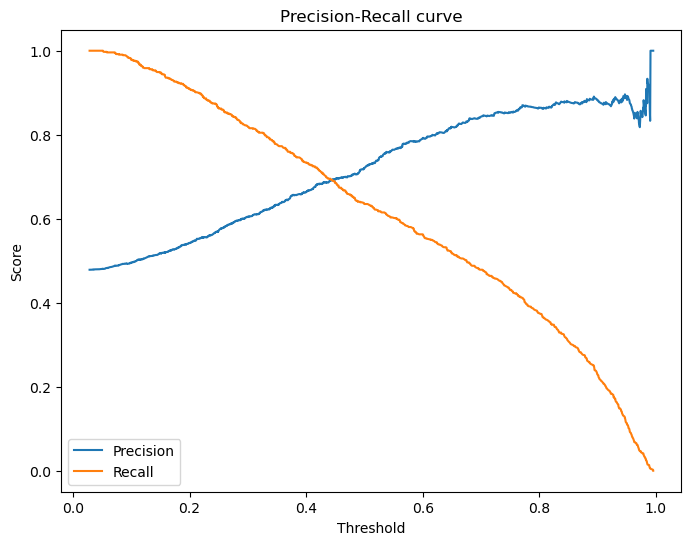

In [29]:
from sklearn.metrics import precision_recall_curve

# Menghitung precision, recall, dan thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Menampilkan Precision-Recall curve
plt.figure(figsize = (8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision')
plt.plot(thresholds, recall[:-1], label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall curve')
plt.show()


**Insight:**
1. Precision vs Recall:
    - Recall meningkat secara signifikan saat threshold diturunkan, yang sesuai dengan tujuan untuk meningkatkan recall dan memastikan sebanyak mungkin nasabah berpotensi berdeposito terdeteksi.
    - Precision cenderung menurun ketika threshold diturunkan karena model mulai memprediksi lebih banyak nasabah sebagai positif (nasabah yang berpotensi berdeposito), yang berisiko meningkatkan false positives.
2. Threshold dan Trade-off:
    - Grafik ini menunjukkan bahwa pada threshold yang lebih rendah, recall meningkat, namun precision menurun. Dengan menurunkan threshold menjadi 0.2, recall mencapai 0.9079, yang menunjukkan bahwa model dapat mendeteksi sebagian besar nasabah berpotensi berdeposito dengan trade-off yang wajar dalam hal precision.

#### ROC Curve
Pada grafik ROC Curve memvisualisasikan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai threshold.

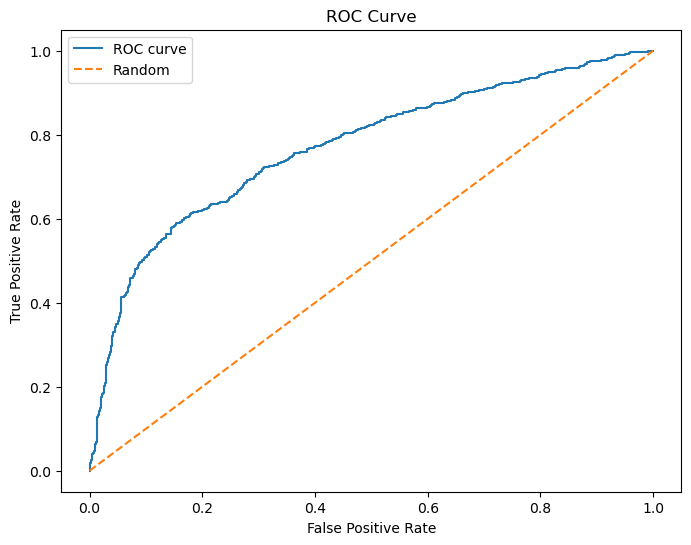

In [30]:
from sklearn.metrics import roc_curve

# Menghitung false positive rate, true positive rate dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menampilkan ROC curve
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


**Insight:**
1. True Positive Rate (TPR) vs False Positive Rate (FPR):
    - Grafik menunjukkan bahwa ROC curve terus meningkat seiring dengan penurunan threshold, menunjukkan peningkatan kemampuan model dalam mendeteksi nasabah yang berpotensi berdeposito dengan mengorbankan beberapa false positives.
    - Garis diagonal (Random) menunjukkan performa model yang sebanding dengan prediksi acak. Model yang lebih baik akan lebih jauh berada di atas garis ini, yang berarti model ini memiliki True Positive Rate yang lebih tinggi dibandingkan False Positive Rate.
2. Evaluasi Model:
    - Dengan melihat perbedaan antara ROC curve dan Random line, dapat dikatakan bahwa model memiliki performansi yang jauh lebih baik daripada acak, meskipun ada peningkatan threshold yang dilakukan untuk memaksimalkan recall.
    - ROC-AUC pada model yang di-tune adalah 0.7703, yang menunjukkan bahwa model ini cukup baik dalam membedakan antara kelas positif dan negatif meskipun false positives mungkin meningkat karena perubahan threshold.

### Feature Importance Analysis
Setelah melatih model dengan XGBoost dan melakukan preprocessing pada fitur, langkah selanjutnya adalah mengevaluasi pentingnya fitur (feature importance). Analisis ini bertujuan untuk memahami seberapa besar kontribusi setiap fitur terhadap keputusan model. Dengan mengetahui fitur mana yang paling berpengaruh, kita dapat lebih memahami faktor-faktor yang mendorong nasabah untuk berdeposito, serta memfokuskan kampanye marketing pada faktor-faktor yang paling relevan.

In [32]:
# Mendapatkan nama fitur setelah preprocessing
feature_names = random_search.best_estimator_.named_steps['Preprocessing'].get_feature_names_out()

# Mendapatkan feature importance dari model XGBoost yang telah di-tuning
importances = random_search.best_estimator_.named_steps['model'].feature_importances_

# Membuat DataFrame untuk melihat fitur dan importance-nya
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Menampilkan DataFrame menggunakan pandas
import pandas as pd
print(feat_imp)

                   Feature  Importance
27   cat__poutcome_success    0.306187
21          cat__month_mar    0.093100
14    cat__contact_unknown    0.082982
24          cat__month_oct    0.067207
25          cat__month_sep    0.051542
18          cat__month_jan    0.029866
11        cat__housing_yes    0.027300
20          cat__month_jun    0.023605
23          cat__month_nov    0.021568
12           cat__loan_yes    0.020345
22          cat__month_may    0.019991
32            scale__pdays    0.017841
15          cat__month_aug    0.017564
16          cat__month_dec    0.015927
19          cat__month_jul    0.014898
31         scale__campaign    0.014549
29              scale__age    0.014330
13  cat__contact_telephone    0.013958
30          scale__balance    0.013461
26     cat__poutcome_other    0.012947
0     cat__job_blue-collar    0.012321
2       cat__job_housemaid    0.011466
3      cat__job_management    0.011275
28   cat__poutcome_unknown    0.010796
1    cat__job_entrepreneu

**Insight:**
1. Fitur Paling Penting:
    - `cat__poutcome_success` memiliki importance tertinggi (0.3062). Ini menunjukkan bahwa hasil kampanye sebelumnya (success) sangat berpengaruh terhadap keputusan nasabah untuk melakukan deposito. Nasabah yang sebelumnya terlibat dalam kampanye yang berhasil lebih cenderung untuk berdeposito. Poutcome sukses menjadi indikator kuat untuk konversi, dan ini bisa menjadi titik fokus untuk kampanye telemarketing, dengan lebih banyak upaya yang diarahkan kepada nasabah yang pernah terlibat dalam kampanye yang sukses.
    - `cat__contact_unknown` memiliki importance tinggi (0.0829), menunjukkan bahwa saluran komunikasi yang tidak diketahui (seperti mungkin panggilan telemarketing atau email yang tidak terdaftar dalam data sebelumnya) juga memainkan peran penting dalam keputusan nasabah. Walaupun terlihat seperti variabel dengan informasi terbatas, saluran komunikasi dapat memberikan indikasi penting tentang efektivitas kampanye dan saluran mana yang lebih mungkin menghasilkan konversi.

2. Bulan Kontak:
    - Beberapa bulan seperti `cat__month_mar`, `cat__month_oct`, dan `cat__month_sep` muncul sebagai fitur yang cukup penting. Ini menunjukkan bahwa waktu nasabah dihubungi dapat mempengaruhi keputusan mereka untuk berdeposito. Faktor musiman atau ekonomi seperti liburan atau akhir tahun bisa berperan dalam keputusan finansial nasabah. Hal ini mengindikasikan bahwa tim marketing mungkin bisa lebih mengoptimalkan waktu kampanye mereka, dengan menghubungi nasabah di bulan-bulan tertentu yang lebih cenderung menghasilkan konversi yang lebih tinggi.

3. Fitur Kategorikal:
    - Status pinjaman (`cat__loan_yes`) dan status kepemilikan rumah (`cat__housing_yes`)berperan penting dalam memprediksi nasabah yang berpotensi berdeposito. Status pinjaman menunjukkan bahwa nasabah dengan kewajiban finansial lebih cenderung untuk tertarik pada produk investasi seperti deposito, sementara kepemilikan rumah menunjukkan kestabilan finansial nasabah, yang bisa berhubungan dengan kemampuan mereka untuk menabung atau berinvestasi.
    - `cat__job_blue-collar` dan `cat__job_management` juga memiliki nilai penting yang signifikan. Nasabah dengan pekerjaan seperti blue-collar dan management lebih cenderung untuk berdeposito dibandingkan dengan pekerjaan lainnya. Ini memberikan wawasan tentang segmen pekerjaan yang mungkin lebih terbuka terhadap produk deposito, dan bisa menjadi target utama kampanye telemarketing.

4. Fitur Numerik:
    - `scale__pdays` (jumlah hari sejak kontak terakhir) memiliki importance yang lebih kecil, namun tetap relevan. Semakin baru nasabah dihubungi, semakin besar kemungkinan mereka untuk berdeposito. Ini menunjukkan bahwa frekuensi dan jarak waktu kontak memainkan peran penting dalam keputusan nasabah, dan dapat menjadi faktor penting dalam penjadwalan follow-up kampanye.
    - `scale__age` dan `scale__balance` menjadi indikator penting dalam memprediksi kecenderungan nasabah untuk berdeposito. Nasabah yang lebih tua dan memiliki saldo yang lebih besar cenderung lebih siap berinvestasi. Oleh karena itu, tim marketing bisa mempertimbangkan untuk memfokuskan lebih banyak usaha pada nasabah dengan saldo besar dan usia yang lebih tua, yang mungkin lebih cenderung tertarik pada produk deposito.

5. Fitur dengan Importance Rendah:
    - Beberapa fitur pekerjaan seperti `cat__job_unknown` atau `cat__job_technician` memiliki importance rendah. Meskipun fitur-fitur ini memberikan informasi tambahan, pengaruhnya terhadap prediksi keputusan nasabah untuk berdeposito relatif kecil. Artinya, meskipun informasi ini masih relevan, tim marketing bisa lebih memfokuskan usaha pada fitur-fitur yang lebih berpengaruh dalam meningkatkan konversi.

## Save Model
Pada bagian ini, model hasil tuning yang telah dilatih menggunakan RandomizedSearchCV disimpan ke dalam file menggunakan Pickle. Proses ini penting untuk memastikan bahwa model yang telah dilatih dan dioptimalkan dapat digunakan kembali di lain waktu tanpa perlu melatih ulang, yang dapat menghemat waktu dan sumber daya komputasi.

Langkah-langkah yang dilakukan:
- Model disimpan dalam file dengan format .pkl menggunakan pickle.dump().
- Ini memungkinkan pemuatan model kembali tanpa perlu melakukan pelatihan ulang, yang sangat efisien untuk digunakan pada sistem produksi atau dalam pengujian lebih lanjut.

In [ ]:
import pickle

# Menyimpan model ke file menggunakan pickle
with open('Model_Bank_Marketing_Campaign.pkl', 'wb') as file:
    pickle.dump(random_search, file)

print("Model telah disimpan menggunakan Pickle.")

Model telah disimpan menggunakan Pickle.


## Load Model
Setelah model disimpan, model dapat dimuat kembali kapan saja untuk digunakan dalam prediksi lebih lanjut atau evaluasi. Proses pemuatan model memungkinkan penggunaan model yang telah disimpan pada aplikasi lain, atau untuk menguji model pada data yang berbeda tanpa melakukan pelatihan ulang.

Langkah-langkah yang dilakukan:
- Model dimuat kembali dari file .pkl menggunakan pickle.load().
- Pemuatan model ini memungkinkan untuk langsung menggunakan model yang telah dioptimalkan tanpa memerlukan data pelatihan atau konfigurasi ulang.

In [ ]:
# Memuat model dari file
with open('Model_Bank_Marketing_Campaign.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat.")

Model berhasil dimuat.


## Testing
Setelah model dimuat, kita dapat mengujinya dengan test data yang telah disiapkan sebelumnya. Tujuan pengujian ini adalah untuk evaluasi performa model pada data yang tidak digunakan selama pelatihan, guna memastikan bahwa model dapat menghasilkan prediksi yang akurat dan dapat digeneralisasi dengan baik.

Langkah-langkah yang dilakukan:
- Menggunakan data uji (test data) yang telah disiapkan untuk mengevaluasi kinerja model yang dimuat.
- Melakukan prediksi menggunakan model yang telah dimuat dan membandingkan hasil prediksi dengan label yang sebenarnya untuk menghitung metrik kinerja seperti accuracy, precision, recall, dan lain-lain.

In [ ]:
# Test data
test_data = pd.DataFrame([
    {
        'job': 'admin.', 
        'housing': 'yes', 
        'loan': 'no', 
        'contact': 'cellular', 
        'month': 'jan', 
        'poutcome': 'success', 
        'age': 28, 
        'balance': 1200, 
        'campaign': 3, 
        'pdays': 10
    },
    {
        'job': 'self-employed', 
        'housing': 'no', 
        'loan': 'yes', 
        'contact': 'telephone', 
        'month': 'feb', 
        'poutcome': 'failure', 
        'age': 34, 
        'balance': 800, 
        'campaign': 2, 
        'pdays': 50
    },
    {
        'job': 'blue-collar', 
        'housing': 'yes', 
        'loan': 'no', 
        'contact': 'cellular', 
        'month': 'mar', 
        'poutcome': 'other', 
        'age': 45, 
        'balance': 1500, 
        'campaign': 4, 
        'pdays': 20
    }
])

# Menampilkan contoh test data
print(test_data)

             job housing loan    contact month poutcome  age  balance  \
0         admin.     yes   no   cellular   jan  success   28     1200   
1  self-employed      no  yes  telephone   feb  failure   34      800   
2    blue-collar     yes   no   cellular   mar    other   45     1500   

   campaign  pdays  
0         3     10  
1         2     50  
2         4     20  


**Insight:**
1. Nasabah pertama (job: admin., housing: yes, loan: no, contact: cellular, month: jan, poutcome: success, age: 28, balance: 1200, campaign: 3, pdays: 10)  
2. Nasabah kedua (job: self-employed, housing: no, loan: yes, contact: telephone, month: feb, poutcome: failure, age: 34, balance: 800, campaign: 2, pdays: 50)  
3. Nasabah ketiga (job: blue-collar, housing: yes, loan: no, contact: cellular, month: mar, poutcome: other, age: 45, balance: 1500, campaign: 4, pdays: 20)

In [ ]:
# Menggunakan pipeline yang sudah dilatih (termasuk preprocessing)
y_pred = loaded_model.predict(test_data)
y_pred_proba = loaded_model.predict_proba(test_data)[:, 1]

# Menampilkan hasil prediksi
print("Predictions:", y_pred)
print("Predicted Probabilities:", y_pred_proba)

Predictions: [1 0 1]
Predicted Probabilities: [0.8669129  0.15844016 0.88979214]


**Prediksi dan Probabilitas:**

Predictions: \[1 0 1]  
- Nasabah pertama dan ketiga diprediksi akan berdeposito (kelas 1), sementara nasabah kedua diprediksi tidak akan berdeposito (kelas 0).

Predicted Probabilities: \[0.8669129  0.15844016 0.88979214]  
- Nasabah pertama: Probabilitas 0.8669 untuk berdeposito, menunjukkan bahwa model cukup yakin bahwa nasabah ini akan berdeposito.  
- Nasabah kedua: Probabilitas 0.1584 untuk berdeposito, yang menunjukkan bahwa model sangat yakin bahwa nasabah ini tidak berdeposito (dengan probabilitas tinggi untuk kelas 0).  
- Nasabah ketiga: Probabilitas 0.8898 untuk berdeposito, menunjukkan keyakinan yang tinggi bahwa nasabah ini akan berdeposito.

## Kesimpulan & Rekomendasi

### Kesimpulan

Berdasarkan analisis yang dilakukan, berikut adalah temuan utama terkait dengan model dan aplikasinya dalam konteks kampanye telemarketing deposito berjangka:

1. Pentingnya Fitur Utama: Fitur-fitur seperti `poutcome_success` (hasil kampanye sebelumnya) menunjukkan pengaruh signifikan dalam memprediksi nasabah yang berpotensi berdeposito. Oleh karena itu, penting bagi tim marketing untuk memprioritaskan nasabah yang pernah terlibat dalam kampanye yang sukses.

2. Performa Model: Model XGBoost menunjukkan recall tertinggi (0.6349), namun masih ada kesulitan dalam mendeteksi nasabah yang berpotensi berdeposito (kelas `1`). Hal ini menunjukkan bahwa model dapat lebih ditingkatkan untuk meminimalkan false negatives, yang sangat krusial dalam konteks biaya peluang yang tinggi.

3. Threshold Tuning: Dengan threshold 0.2, recall mencapai 0.91, menunjukkan keseimbangan yang baik antara mendeteksi nasabah berpotensi berdeposito dan mengelola false positives. Ini memberikan pendekatan yang lebih ekonomis untuk kampanye telemarketing tanpa meningkatkan biaya secara drastis.

4. Pengujian pada Data Uji: Pengujian model menggunakan data uji menunjukkan bahwa model cukup efektif dalam memprediksi nasabah yang berpotensi berdeposito. Namun, beberapa false negatives masih terjadi, yang memerlukan perbaikan lebih lanjut.

---

### Rekomendasi

1. Fokus pada Nasabah dengan Kampanye Sukses Sebelumnya  
   Berdasarkan feature importance dan analisis model, nasabah yang telah terlibat dalam kampanye yang sukses sebelumnya memiliki probabilitas tinggi untuk berdeposito. Tim marketing sebaiknya mengutamakan nasabah yang memiliki hasil positif (success) dalam kampanye sebelumnya, karena mereka lebih cenderung untuk melakukan deposit.

2. Optimalisasi Waktu Kampanye  
   Bulan tertentu, seperti `mar`, `oct`, dan `sep`, menunjukkan peningkatan penting dalam konversi. Oleh karena itu, tim marketing sebaiknya mengoptimalkan penjadwalan kampanye telemarketing pada bulan-bulan tersebut untuk meningkatkan peluang konversi.

3. Meningkatkan Recall untuk Kelas `1` (Nasabah yang Berdeposito)  
   Threshold tuning telah menunjukkan bahwa threshold 0.2 memberikan trade-off yang wajar antara recall dan precision. Namun, untuk mengurangi false negatives, tim dapat terus menyesuaikan threshold atau menerapkan teknik model lebih lanjut seperti oversampling untuk kelas minoritas (nasabah yang berdeposito).

4. Penggunaan Fitur Keuangan untuk Penargetan  
   Status pinjaman dan kepemilikan rumah merupakan indikator penting untuk memprediksi nasabah yang lebih cenderung berdeposito. Tim marketing harus lebih memfokuskan usaha pada nasabah dengan status pinjaman dan rumah yang lebih stabil, karena mereka lebih mungkin berinvestasi dalam produk deposito.